KNN Algorithm

In [369]:
import pandas as pd
import numpy as np
import seaborn as sns

In [370]:
#Reading the csv File

Bpldf=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [371]:
#Checking the dimension of the Dataframe(Rows and Columns)

Bpldf.shape

(5000, 14)

In [372]:
#Checking the Datatypes of all the Columns in the Dataframe

Bpldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [373]:
#Checking the Top 5 Records

Bpldf.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [374]:
#Checking the target columns distribution

Bpldf['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [375]:
#Checking if any missing values in the Dataframe

Bpldf.isnull().sum().sum()

0

In [376]:
#Removing Rows which having experience in Negative

Bpldf.drop(Bpldf[Bpldf['Experience'] < 0].index,inplace=True)

In [377]:
#Verifying the dimesnion of the Dataframe after removing the negative exerience column

Bpldf.shape

(4948, 14)

In [378]:
#Verifying top 5 records

Bpldf.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [379]:
#As ID and ZIP Code Won't hold much in the analysis ,so removing these columns

Bpldf.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [380]:
Bpldf.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [381]:
Bpldf['Personal Loan'].value_counts()

0    4468
1     480
Name: Personal Loan, dtype: int64

In [382]:
Bpldf.shape

(4948, 12)

In [383]:
#Basic statistics(checking Central Tendency and Disperison)

Bpldf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4948.0,45.557195,11.320735,24.0,36.00,46.0,55.0,67.0
Experience,4948.0,20.331043,11.311973,0.0,10.75,20.0,30.0,43.0
Income,4948.0,73.814470,46.112596,8.0,39.00,64.0,98.0,224.0
Family,4948.0,2.391471,1.148444,1.0,1.00,2.0,3.0,4.0
CCAvg,4948.0,1.935926,1.747694,0.0,0.70,1.5,2.6,10.0
Education,4948.0,1.878941,0.839745,1.0,1.00,2.0,3.0,3.0
Mortgage,4948.0,56.634398,101.828885,0.0,0.00,0.0,101.0,635.0
Personal Loan,4948.0,0.097009,0.296000,0.0,0.00,0.0,0.0,1.0
Securities Account,4948.0,0.104285,0.305660,0.0,0.00,0.0,0.0,1.0
CD Account,4948.0,0.061035,0.239418,0.0,0.00,0.0,0.0,1.0


In [384]:
X=Bpldf.drop('Personal Loan',axis=1)
y=Bpldf['Personal Loan']

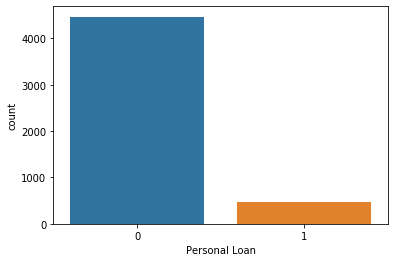

In [385]:
#Get the target column distribution.

sns.countplot(x='Personal Loan',data=Bpldf)

In [386]:
#Preparing the Train and Test Datasets:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3463, 11)
(1485, 11)
(3463,)
(1485,)


In [387]:
#Performing scailing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import sklearn.metrics as sm

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test= sc.transform(X_test)

In [388]:
#Importing KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [389]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9760323419000866
0.9548821548821549


In [390]:
#Predicted (on Test Datasets)

y_pred=model.predict(X_test)

In [391]:
expected=y_test
predicted=y_pred

In [392]:
#Importing Model Evaluation modules

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix(expected,predicted)

array([[1330,   10],
       [  57,   88]])

In [393]:
print(classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1340
           1       0.90      0.61      0.72       145

    accuracy                           0.95      1485
   macro avg       0.93      0.80      0.85      1485
weighted avg       0.95      0.95      0.95      1485



               Logistic Regression

In [394]:
#Reading the csv File

Bpllog=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [395]:
#Checking if any missing values in the Dataframe

Bpllog.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [396]:
#Removing Rows which having experience in Negative

Bpllog.drop(Bpllog[Bpllog['Experience'] < 0].index,inplace=True)

In [397]:
#Checking the dimension of the Dataframe(Rows and Columns)

Bpllog.shape

(4948, 14)

In [398]:
#As ID and ZIP Code Won't hold much in the analysis ,so removing these columns

Bpllog.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [399]:
Bpllog.shape

(4948, 12)

In [400]:
#Target column Distribution

Bpllog['Personal Loan'].value_counts()

0    4468
1     480
Name: Personal Loan, dtype: int64

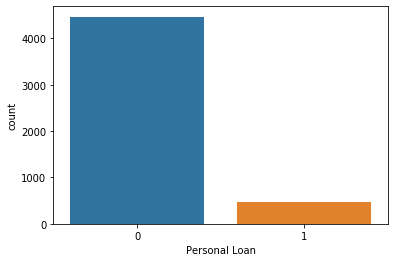

In [401]:
#Get the target column distribution.

sns.countplot(x='Personal Loan',data=Bpllog)

In [402]:

from sklearn.model_selection import train_test_split

In [403]:
X=Bpllog.drop('Personal Loan',axis=1)
y=Bpllog['Personal Loan']

In [404]:
#Preparing the Train and Test Datasets:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [405]:
#Importing Logistics Regression

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [406]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9497545480796997
0.9515151515151515


In [407]:
#Importing Model Evaluation modules
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [408]:
#Predicted (on Test Datasets)
y_pred=model.predict(X_test)

In [409]:
expected=y_test
predicted=y_pred

In [410]:
confusion_matrix(expected,predicted)

array([[1321,   19],
       [  53,   92]])

In [411]:
print(classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1340
           1       0.83      0.63      0.72       145

    accuracy                           0.95      1485
   macro avg       0.90      0.81      0.85      1485
weighted avg       0.95      0.95      0.95      1485



               Naive Bayes

In [412]:
#Reading the csv File

Bplnv=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [413]:
#Checking the dimension of the Dataframe(Rows and Columns)
Bplnv.shape

(5000, 14)

In [414]:
#Removing Rows which having experience in Negative

Bplnv.drop(Bplnv[Bplnv['Experience'] < 0].index,inplace=True)

In [415]:
Bplnv.shape

(4948, 14)

In [416]:
#Target Column Distribution

Bplnv['Personal Loan'].value_counts()

0    4468
1     480
Name: Personal Loan, dtype: int64

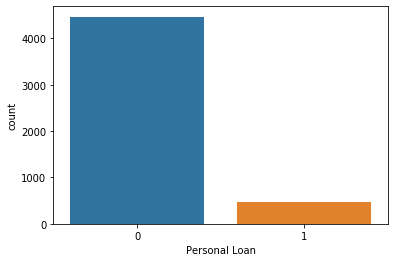

In [417]:
#Get the target column distribution plotting.

sns.countplot(x='Personal Loan',data=Bplnv)

In [418]:
#As ID and ZIP Code Won't hold much in the analysis ,so removing these columns

Bplnv.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [419]:
X=Bplnv.drop('Personal Loan',axis=1)
y=Bplnv['Personal Loan']

In [420]:
#Preparing the Train and Test Datasets:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [421]:
#Importing Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

In [422]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [423]:
predicted=model.predict(X_test)
expected=y_test

In [424]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.885937048801617
0.8774410774410775


In [425]:
#Importing Model Evaluation modules

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(expected,predicted))
print(confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1340
           1       0.41      0.57      0.48       145

    accuracy                           0.88      1485
   macro avg       0.68      0.74      0.70      1485
weighted avg       0.90      0.88      0.89      1485

[[1220  120]
 [  62   83]]


In [426]:
#-->1. The best model out of the three which is performing best on this data is KNN.
#-->2. This algorithm(KNN)is  Easy and simple machine learning model.
#-->3. KNN has some nice properties: it is automatically non-linear, 
#--4. it can detect linear or non-linear distributed data, it tends to perform very well with a lot of data points.
#--5. if you have a lot of points in a low dimensional space then KNN is probably a good choice.
##  KNN on Training:0.9760323419000866
##  KNN on Test:0.9548821548821549